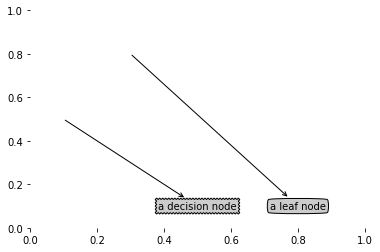

In [2]:
import matplotlib.pyplot as plt

# define text box and arrow style
decisionNode = dict(boxstyle = "sawtooth", fc = "0.8")
leafNode = dict(boxstyle = "round4", fc = "0.8")
arrowArgs = dict(arrowstyle = "<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy = parentPt, \
        xycoords = 'axes fraction', xytext = centerPt, \
        textcoords = 'axes fraction', va = 'center', \
        ha = 'center', bbox = nodeType, arrowprops = arrowArgs)

# create a simple plot
def createPlot():
    fig = plt.figure(1, facecolor = 'white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon = False)
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

createPlot()

In [10]:
# get number of total leafs
def getNumLeafs(myTree):
    numLeafs = 0
    currKey = myTree.keys()[0]
    currDict = myTree[currKey]
    for key in currDict.keys():
        if type(currDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(currDict[key])
        else:
            numLeafs += 1
    return numLeafs

# get total tree depth
def getTreeDepth(myTree):
    maxDepth = 0
    currKey = myTree.keys()[0]
    currDict = myTree[currKey]
    for key in currDict.keys():
        if type(currDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(currDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

# return an element of decision tree
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                   {'no surfacing': {0: 'no', 1: {'flippers': {0: \
                        {'head': {0: 'no', 1: 'yes'}}, 1: 'yes'}}}}]
    return listOfTrees[i]

tree1 = retrieveTree(0)
print tree1
tree2 = retrieveTree(1)
print tree2

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
{'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'yes'}}}}


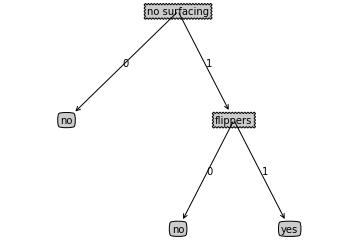

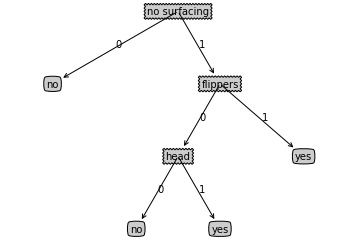

In [11]:
# put text between current and parent node point
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)
    
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    currKey = myTree.keys()[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, \
              plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(currKey, cntrPt, parentPt, decisionNode)
    currDict = myTree[currKey]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in currDict.keys():
        if type(currDict[key]).__name__ == 'dict':
            plotTree(currDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(currDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD
    
def createPlot(inTree):
    fig = plt.figure(1, facecolor = 'white')
    fig.clf()
    axprops = dict(xticks = [], yticks = [])
    createPlot.ax1 = plt.subplot(111, frameon = False, **axprops)
    # get total tree width and height
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()
    
createPlot(tree1)
createPlot(tree2)